## Mall Customers Dataset.
<b> So, we have a dataset of "Mall_Customers.csv", which is the data of customers who visit the mall and spend there. In this article, we are going to segment these customers based on the details given, by using Machine Learning algorithms. The algorithms included DBSCAN Clustering Algorithm.


## Step - 1 : Business Problem Understanding
<b> <b> There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the Spending score of all customers. We have to segment these customers based on the details given.
    
<b> Create a model that can help to segment these customers based on the details given, by using Machine Learning algorithms.
    

    

<b> importing all the necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

<b> In the above, i have imported all the necessary libraries.

## Step - 2 : Data Understanding
### 2.1 Data Collection
<b>Load the dataset by using read_csv() to read the dataset and save it to the 'data' object and take a look at the first 5 lines using the head() method.

In [2]:
# Load the dataset.
data = pd.read_csv("Mall_Customers.csv")

# Display the first 5 lines using the head() method.
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### 2.2 Data Understanding


<b> Mall_Customers.csv : Which is the data of customers who visit the mall and spend there. Contains variables:
    
- Customer_Id: Customers unique id's.

- Gender: Gender of the customers.

- Age: Age of the customers.

- Annual Income (k$): Annual Income of the customers in thousands dollar.

- Spending Score (1-100): Score given based on spending.



<b> Let’s have a look at data dimensionality.

In [3]:
data.shape

(200, 5)

<b> From the output, we can see that the table contains 200 rows and 5 columns.
    
    
<b> We can use the info() method to output some general information about the dataframe :

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


<b> int64 and object are the data types of our features. We see 4 features are numeric (features are int64) and 1 feature is categorical.  With this same method, we can easily see if there are any missing values. Here, there are none because each column contains 200 observations, the same number of rows we saw before with shape. 
   

## Step - 3 : Data Preprocessing
### 3.1 Exploratory Data Analysis (EDA) and Data Visualization


<b> The describe method shows basic statistical characteristics of each numerical feature (int64 types): count, mean, standard deviation, min, max, median, 0.25 and 0.75 quartiles.

In [5]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<b> Checking the unique values/categories from the "Age" variable.

In [6]:
# Finding the number of males and females in the data
data.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

<b> Now visualising the number of males and females in the data.

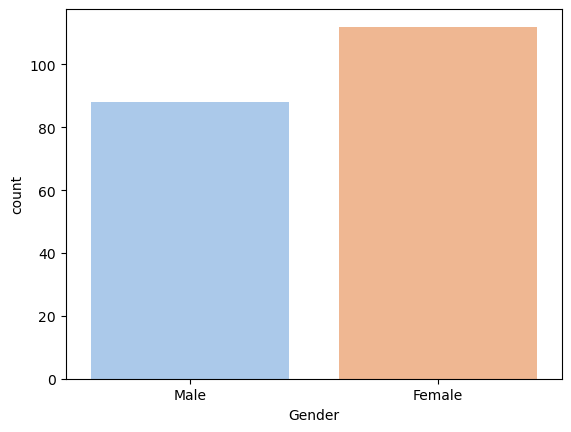

In [7]:
# Visualising the number of males and females in the data
sns.countplot(x="Gender",data=data,palette="pastel")

# Display all figures.
plt.show()

<b> From the above plot, we can see that the number of females customers is more than the number of male customers.
    
<b> Computing minimum and maximum age of customers.

In [8]:
# Computing minimum and maximum age of customers
print(min(data.Age))
print(max(data.Age))

18
70


<b> Now visualising the age distribution of customers.

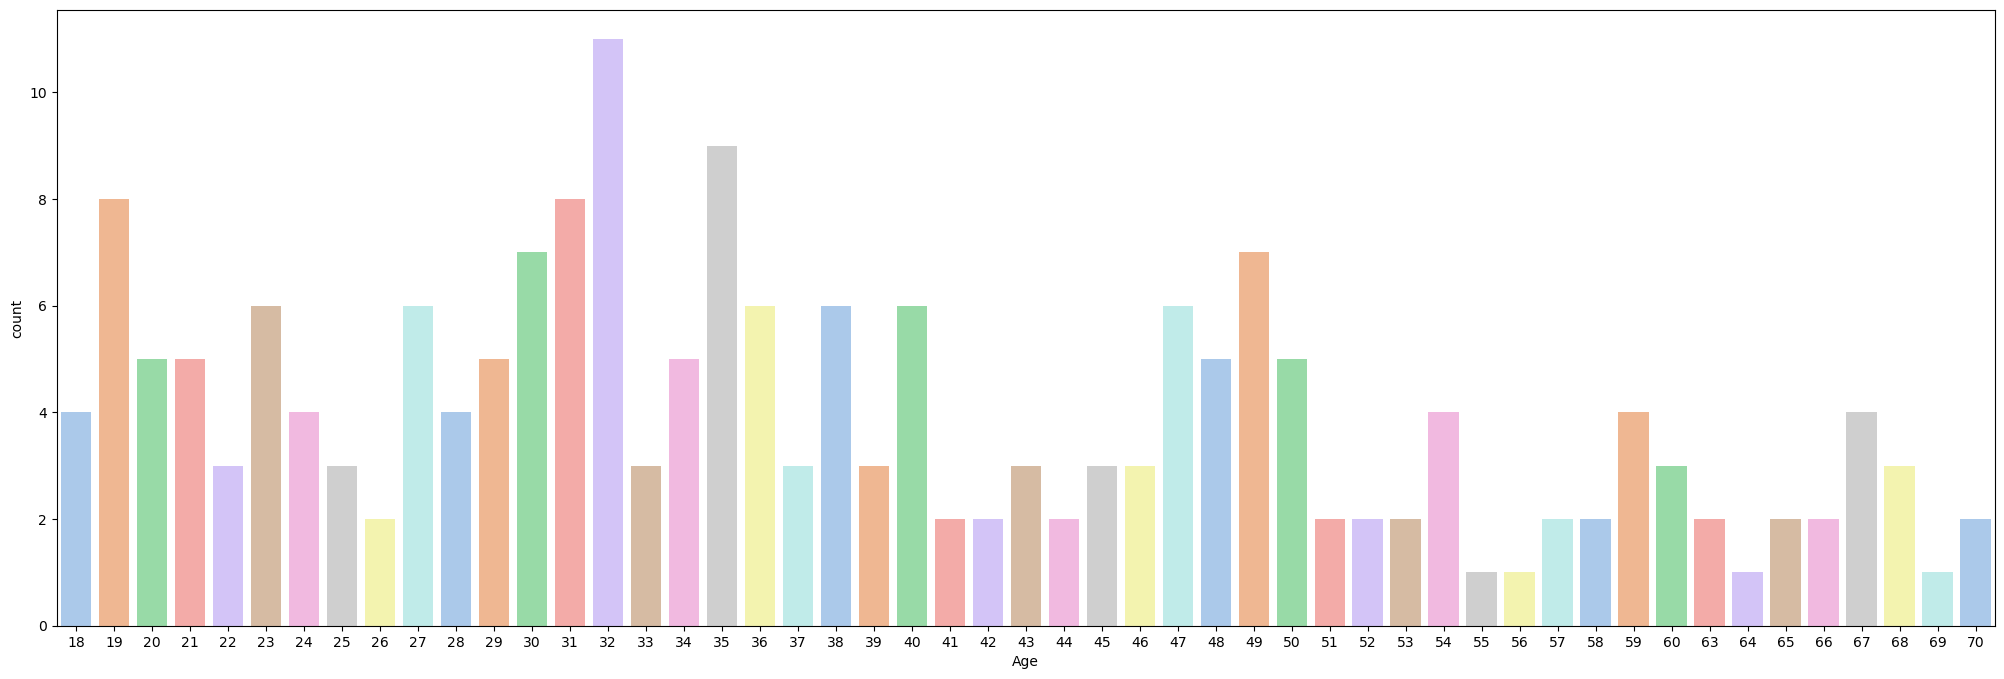

In [9]:
# Visualising the age distribution of customers
plt.figure(figsize=(25,8))
sns.countplot(x="Age",data=data,palette="pastel")

# Display all figures.
plt.show()

<b> From the above plot, Customers with age 32 make for the largest number of customers.

<b> Now use the value_counts method on target variable (species).

<b> Now visualising the income distribution of customers.

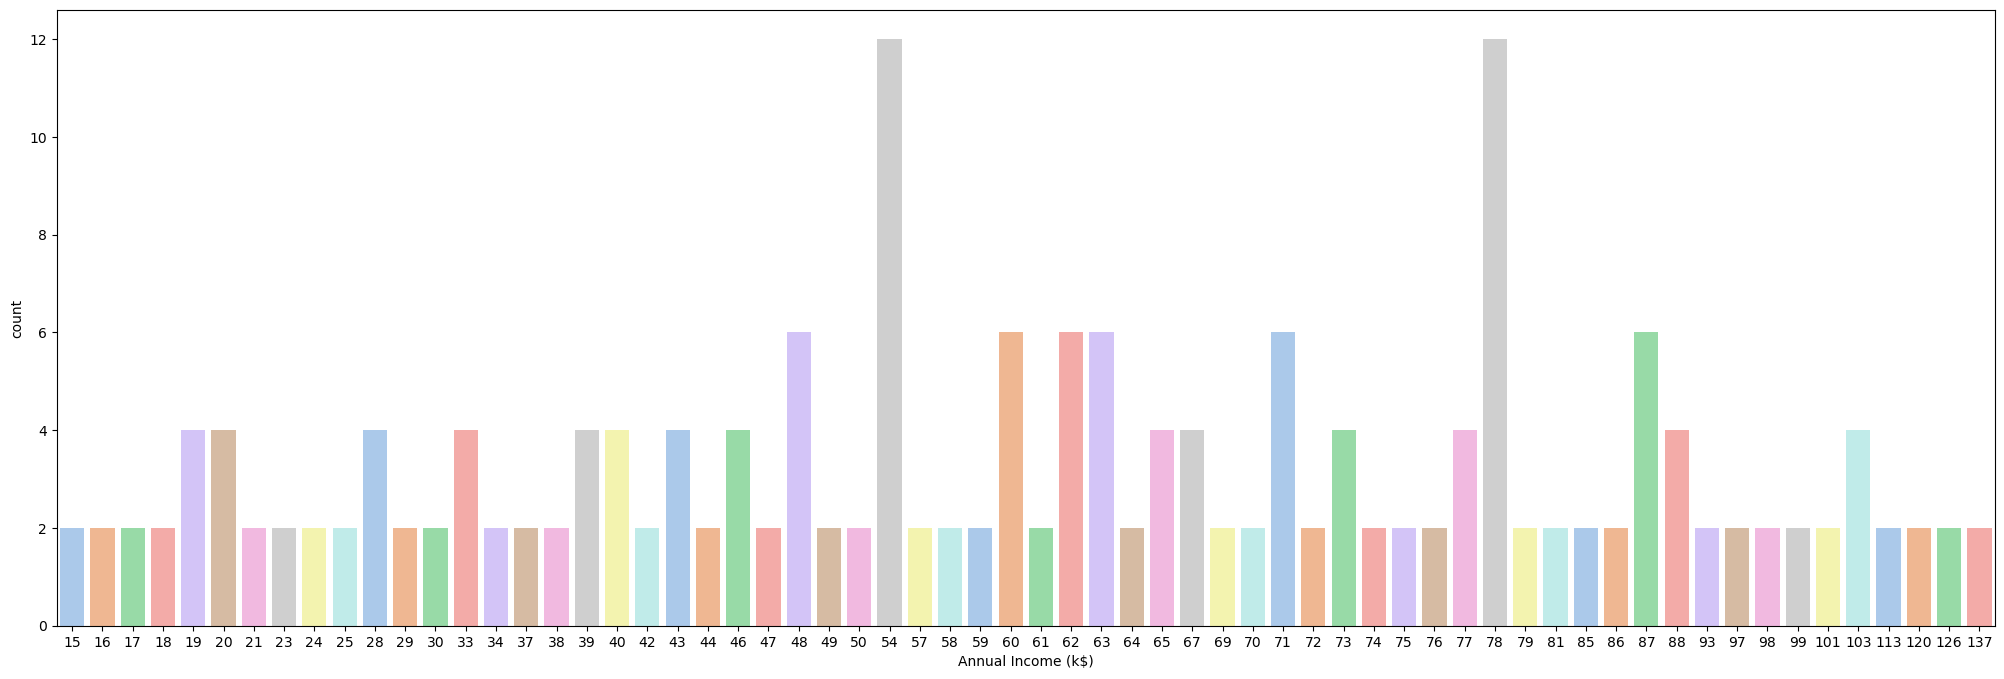

In [10]:
# Visualising the income distribution of customers
plt.figure(figsize=(25,8))
sns.countplot(x="Annual Income (k$)",data=data,palette="pastel")

# Display all figures.
plt.show()

<b> From the above plot, Customers with annual income of 54k and 78k make for the largest number of customers.

<b> Visualising the spending score of customers.

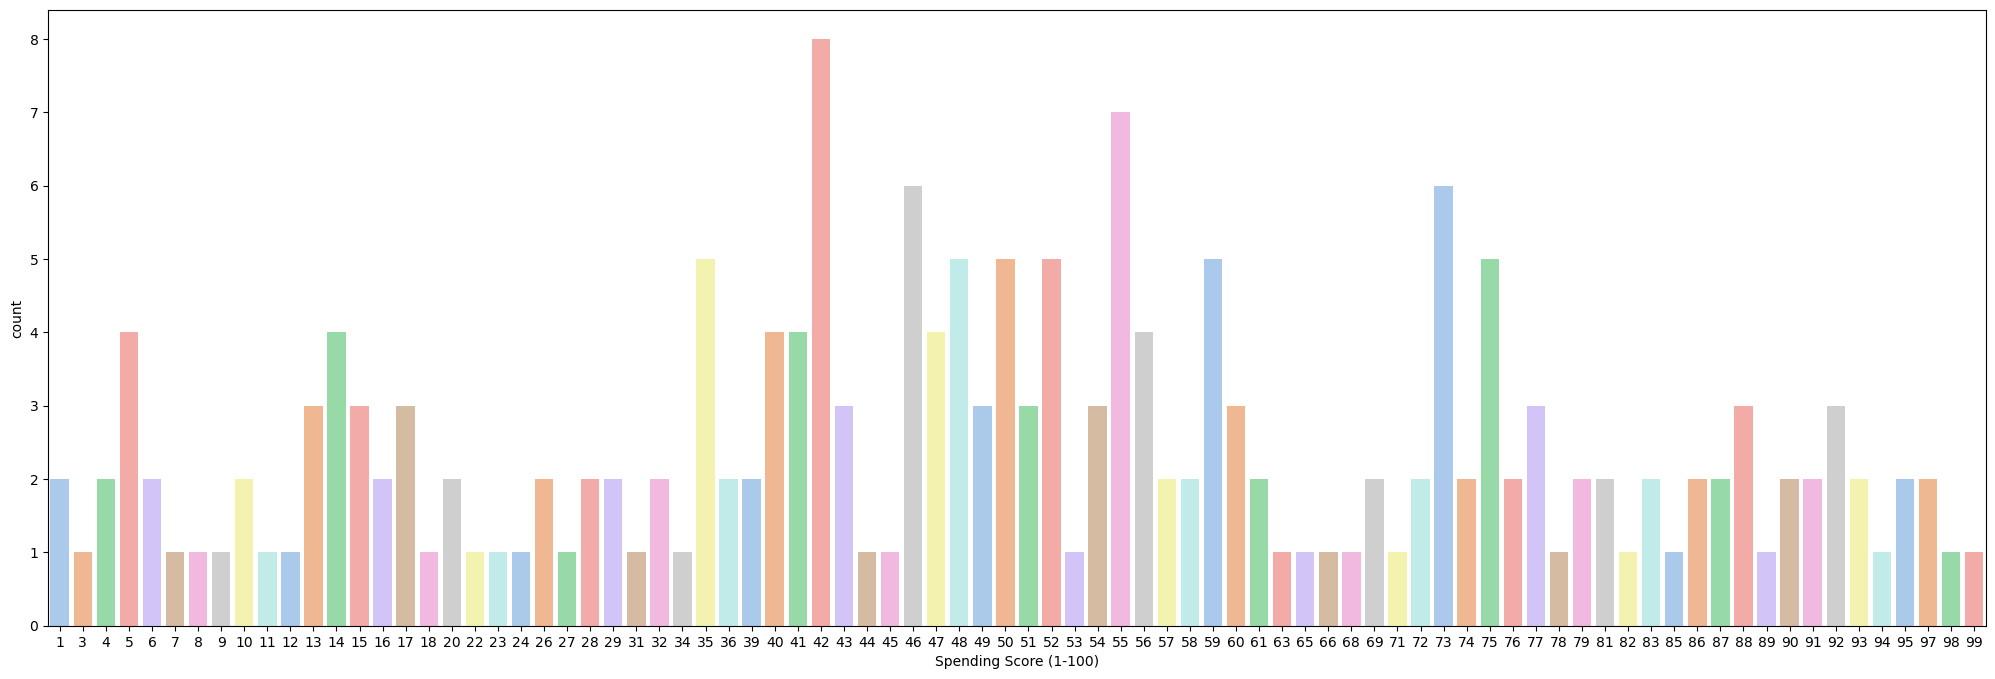

In [11]:
# Visualising the spending score of customers
plt.figure(figsize=(25,8))
sns.countplot(x="Spending Score (1-100)",data=data,palette="pastel")

# Display all figures.
plt.show()

<b> From the above plot, The maximum spending score is 42.

<b> Finding correaltion between all the parameters in the dataset.

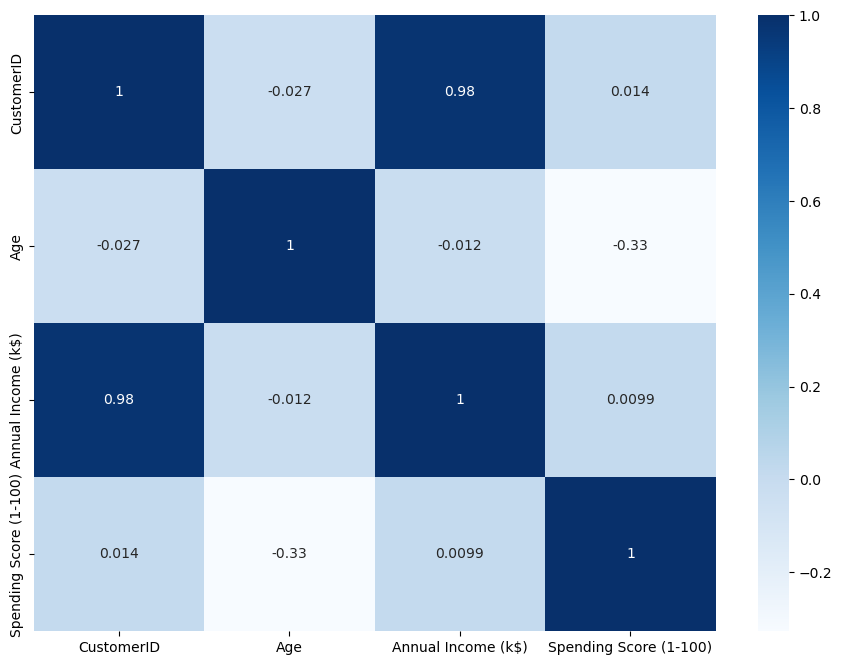

In [12]:
# Finding correaltion between all the parameters in the dataset.
fig,ax = plt.subplots(figsize=(11,8))
sns.heatmap(data.corr(),annot=True,cmap="Blues" ,ax=ax)

# Display all figures.
plt.show()

<b> Based on the above correlation matrix, now making clusters based on Annual income and Spending Score.

### 3.2 Data Cleaning
<b> Checking the Empty cells / Missing values :
- The isnull().sum() method returns the total number of missing values (count) present in the each column.

In [13]:
# Check the missing values records.
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

<b> In the above, we can see that there is no missing values.

### 3.3 Extracting Independent Variables.
    
<b> Here we don't need any dependent variable for data pre-processing step as it is a clustering problem, and we have no idea about what to determine. So we will just add a line of code for the matrix of features.

In [14]:
# Create x variable.
x = data.iloc[:, [3, 4]].values                                                      

<b> As we can see, we are extracting only 3rd and 4th feature. It is because we need a 2d plot to visualize the model, and some features are not required, such as customer_id, Age and Gender.

## Step - 4 : DBSCAN MODEL BUILDING:
DBSCAN model requires 2 important parameters - eps (which is the radius of the cluster) and the min_samples which is the minimum number of data points within each cluster. We can now train our model. The code is given below:

In [15]:
# Modelling - model building with 8 as eps and 4 as the minimum number of samples on "x" object.

# import the DBSCAN from sklearn.cluster library.
from sklearn.cluster import DBSCAN 

# creating object hc of class AgglomerativeClustering()
dbs= DBSCAN(eps=8, min_samples=4)      

# Predict
y_dbs= dbs.fit_predict(x)


In the above code, we have imported the DBSCAN class of cluster module of scikit learn library.

Then we have created the object of this class named as dbs. The DBSCAN class takes the following parameters:

- EPS (default=0.5): It is considered as the maximum radius of the neighborhood.


- MinPts (default=5): MinPts refers to the minimum number of points in an Eps neighborhood of that point.


- metric (default='euclidean): The metric to use when calculating distance between instances in a feature array.


In the last line, we have created the dependent variable y_dbs to fit or train the model. It does train not only the model but also returns the clusters to which each data point belongs.

In [16]:
# print the y_dbs
y_dbs

array([ 2,  0,  1,  0,  2,  0,  1, -1,  1,  0,  1, -1,  1,  0,  1,  0,  2,
        0,  2, -1,  2,  0,  1,  0, -1,  0,  2, -1,  2,  0,  1,  0, -1,  0,
       -1,  0, -1,  0,  3,  0,  3, -1,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  4,  3,  4,  3,  4,  5,  4,  5,  4,  3,  4,  5,  4,
        5,  4,  5,  4,  5,  4,  3,  4,  5,  4,  3,  4,  5,  4,  5,  4,  5,
        4,  5,  4,  5,  4,  5,  4,  3,  4,  5,  4,  5,  4,  5,  4,  5,  4,
        5,  4,  5,  4,  5,  4,  5,  4,  5,  4, -1,  4,  5,  4, -1, -1,  6,
       -1,  6,  4,  6, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

<b> Creating the "y_dbs" to DataFrame as "cluster" and same storing in the data object.

In [17]:
# Creating the "y_dbs" to DataFrame as "cluster" and same storing in the "data" object.
data["cluster"] = pd.DataFrame(y_dbs)

# print the dataset.
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,0
2,3,Female,20,16,6,1
3,4,Female,23,16,77,0
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,-1
196,197,Female,45,126,28,-1
197,198,Male,32,126,74,-1
198,199,Male,32,137,18,-1


In [18]:
# print the unique clusters
data["cluster"].unique()

array([ 2,  0,  1, -1,  3,  4,  5,  6], dtype=int64)

In [19]:
#finding outliers in our model
np.sum(data["cluster"]==-1)

22

<b> The values have -1 as output which symbolifies outliers. Eventhough our model has a few outliers we can see that clusters are formed between 0 to 6. Hence 7 number of clusters are totally formed.

## Step - 5 : DBSCAN Model Evaluation :
<b> Calculate Silhouette score for DBSCAN clusters with eps=8, min_samples=4
    
<b> silhouette_score (sklearn.metrics) for the data set is used for measuring the mean of the Silhouette Coefficient for each sample belonging to different clusters.
    
<b> silhouette_samples (sklearn.metrics) provides the Silhouette scores for each sample of different clusters.

In [20]:
# Calculate Silhoutte Score for DBSCAN Modelling

# import the silhouette_score class from sklearn.metrics library.
from sklearn.metrics import silhouette_score

# Calculate Silhoutte Score
score = silhouette_score(x, dbs.labels_, metric='euclidean')

# Print the score
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.389


As we can see in the above code, we have used the silhouette_score class of sklearn,metrics library to form the score. In the second line, we have calculated silhouette score for DBSCAN clusters with eps=8, min_samples=4. The parameters of silhouette score as:
    
- X: An array of pairwise distances between samples, or a feature array (independent variables).
    
    
- labels_ : Predicted labels for each sample.
    
    
- metric (default=’euclidean’): The metric to use when calculating distance between instances in a feature array.
    
    
And finally printed the Mean Silhouette Coefficient for all samples. So the Silhouetter Score=0.389, based on the score we conclude that we have got a best (good) model for this dataset on eps=8, min_samples=4. 
    
    
**Note:** The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.    
    